In [1]:
import _pickle as cp
import numpy as np

### Dataset Loader

In [2]:
def load_dataset(name, get_xy = False):
    X,y = cp.load(open(name,'rb'))
    if get_xy:
        return X, y
    N, D = X.shape
    N_train = int(.8 * N)
    N_test = N - N_train
    
    X_train = X[:N_train]
    y_train = y[:N_train]
    X_test = X[N_train:]
    y_test = y[N_train:]
    
    return X_train, y_train, X_test, y_test

### Task 1 - Visualisation

In [3]:
import matplotlib.pyplot as plt

In [4]:
def visualise(name):
    X, y = load_dataset(name, True)
    unique, counts = np.unique(y.astype(int), return_counts=True)
    print(unique)
    print(counts)
    plt.bar(range(min(unique),max(unique)+1), counts)
    plt.show()

### Task 2 - Predict average as solution and find MSE

In [5]:
def mean_predictor(y_train, y_test):
    y_avg = np.mean(y_train)
    mse = np.mean(np.power(y_test - y_avg, 2))
    print('The average is '+str(y_avg))
    print('The mse is '+str(mse))

### Task 3 - Linear Regression & Task 4 - Plot Effect of varying train size on MSE

In [6]:
import os

def scaler(X, reset = False, verbose = False):
    if os.path.exists('musigma.pickle') and not reset:
        if verbose:
            print('musigma exists!, using values')
        mean, std = cp.load(open('musigma.pickle','rb'))
        X = (X-mean)/std
    else:
        if verbose:
            print('musigma doesn\'t exist!, creating values')
        mean = np.mean(X)
        std = np.std(X)
        musigma = (mean, std)
        cp.dump(musigma,open('musigma.pickle', 'wb'))
        X = (X-mean)/std
        
    return X


def mean_squared_error(y, y_pred):
    return np.mean(np.power(y-y_pred, 2))

def train_validation_split(X_train, y_train):
    x_t = X_train[:int(len(X_train)*.8)]
    x_v = X_train[int(len(X_train)*.8):]
    y_t = y_train[:int(len(X_train)*.8)]
    y_v = y_train[int(len(X_train)*.8):]
    
    return x_t, x_v, y_t, y_v

def linear_regression(X_train, y_train, X_test, y_test, train_size=None, train_validation = True, verbose = False):
    if train_validation:
        x_t, x_v, y_t, y_v = train_validation_split(X_train, y_train)
    else:
        x_t = X_train[:train_size]
        y_t = y_train[:train_size]
        x_v = X_test
        y_v = y_test
    
    x_train_scaled = scaler(x_t, True)
    w = np.matmul(np.matmul(np.linalg.pinv(np.matmul(x_train_scaled.T, x_train_scaled)),x_train_scaled.T),y_t)
    
    y_pred = np.matmul(x_train_scaled, w)
    mse_t = mean_squared_error(y_t, y_pred)
    if train_validation:
        print('The mean squared error on train is '+str(mse_t))
    
    
    x_validation_scaled = scaler(x_v)
    y_pred = np.matmul(x_validation_scaled, w)
    mse_v = mean_squared_error(y_v, y_pred)
    if train_validation:
        print('The mean squared error on validation is '+str(mse_v))
    np.save('weights.npy', w)
    if verbose:
        print('Weights saved')
    return (mse_t, mse_v)
    

In [7]:
def linear_regression_predict(x):
    w = np.load('weights.npy')
    y_pred = np.matmul(x,w)
    return y_pred

In [8]:
def linear_regression_predict_with_mse(x, y):
    y_pred = linear_regression_predict(x)
    mse = mean_squared_error(y_pred, y)
    print('The mean squared error is '+str(mse))
    return y_pred

In [9]:
def size_varying_train(X_train, y_train, X_test, y_test):
    mse_train = []
    mse_test = []
    for i in range(20, X_train.shape[0]+1, 20):
        mse_pair = linear_regression(X_train, y_train, X_test, y_test, i, train_validation= False)
        if i%100 == 0:
            print('Train size:'+str(i)+' train error:'+str(mse_pair[0])+' test error:' + str(mse_pair[1]))
        mse_train.append(mse_pair[0])
        mse_test.append(mse_pair[1])
    
    plt.plot(range(20,X_train.shape[0]+1, 20), mse_train, 'r', label = 'Train')
    plt.plot(range(20,X_train.shape[0]+1, 20), mse_test, 'b', label = 'Test')
    plt.xlabel('Train size')
    plt.ylabel('Mean Squared Error')
    plt.title('Train Size vs Mean Squared Error')
    plt.show()

In [10]:
def main():
    i = input('Enter 1 for red wine and 2 for white wine')
    name = None
    if int(i) == 1:
        name = 'winequality-red.pickle'
    elif int(i) == 2:
        name = 'winequality-white.pickle'
    else:
        print('Wrong choice!')
        return
    visualise(name)
    X_train, y_train, X_test, y_test = load_dataset(name)
    mean_predictor(y_train, y_test)
    linear_regression(X_train, y_train, X_test, y_test)
    linear_regression_predict_with_mse(X_test, y_test)
    size_varying_train(X_train, y_train, X_test, y_test)

Enter 1 for red wine and 2 for white wine1
[3 4 5 6 7 8]
[ 10  53 681 638 199  18]


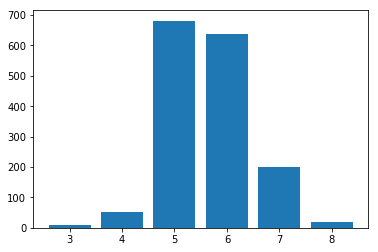

The average is 5.62470680219
The mse is 0.745345570719
The mean squared error on train is 0.401942011069
The mean squared error on validation is 0.385870656968
The mean squared error is 1633.41931452
Train size:100 train error:0.307766735441 test error:0.539769507304
Train size:200 train error:0.391175869666 test error:0.495576959332
Train size:300 train error:0.389793694866 test error:0.511555092207
Train size:400 train error:0.400502470447 test error:0.499559446827
Train size:500 train error:0.399399739568 test error:0.496930937861
Train size:600 train error:0.390955755964 test error:0.496560654966
Train size:700 train error:0.405293478835 test error:0.493821722846
Train size:800 train error:0.405365954412 test error:0.489294419784
Train size:900 train error:0.397806876642 test error:0.489092544483
Train size:1000 train error:0.397121016083 test error:0.492446297905
Train size:1100 train error:0.401402074825 test error:0.49712313109
Train size:1200 train error:0.403850844812 test err

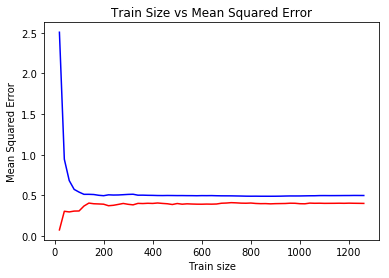

In [11]:
main()

Enter 1 for red wine and 2 for white wine2
[3 4 5 6 7 8 9]
[  20  163 1457 2198  880  175    5]


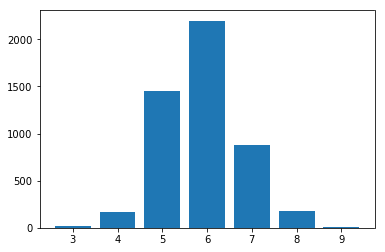

The average is 5.87876467586
The mse is 0.813857300005
The mean squared error on train is 0.564998645178
The mean squared error on validation is 0.600466228909
The mean squared error is 53746.8840465
Train size:100 train error:0.568629863107 test error:0.624914303906
Train size:200 train error:0.54454628833 test error:0.583364251312
Train size:300 train error:0.586959459106 test error:0.572453649901
Train size:400 train error:0.54152474435 test error:0.571053285017
Train size:500 train error:0.561051583921 test error:0.567664473548
Train size:600 train error:0.577928015179 test error:0.570519633683
Train size:700 train error:0.580300526519 test error:0.569945274568
Train size:800 train error:0.573702419688 test error:0.571656202184
Train size:900 train error:0.566797183793 test error:0.5710509755
Train size:1000 train error:0.580049383627 test error:0.570839075785
Train size:1100 train error:0.574282132323 test error:0.569848001289
Train size:1200 train error:0.571257838003 test error:

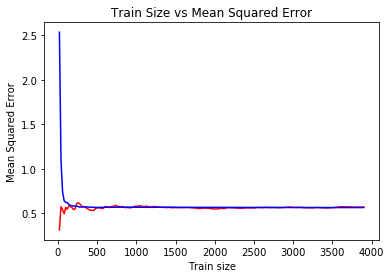

In [12]:
main()